#  1.2 OLAP Functions

In dieser Übung kannst du folgende OLAP functions üben...
+ Slicing
+ Dicing
+ Pivoting
+ Drill-down

<div class="alert alert-block alert-info">
<font size="3"><b>Recap:</b></font> OLAP is a category of software technology that enables users to analyze data from multiple perspectives and dimensions. Instead of looking at individual transactions, OLAP tools help users summarize, group, filter, and explore data to uncover trends, patterns, and insights. This is particularly useful in domains such as business intelligence, financial reporting, and sales analysis.
</div>
<br>

Before we start, we load the housing data set from sklearn and pandas, a library specifically for data manipulation (and analysis).
<br>
If you haven't installed sklearn yet type into your anaconda shell  ``conda install conda-forge::scikit-learn``
<br>
The dataset contains the following values:

    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude
    - MedHouseVal   median house value in block group

Also, the dataset covers more than 20.000 residental blocks! Let's see if we can trim that down to a meaningful number of blocks.

In [17]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt 

housing = fetch_california_housing(as_frame=True)
df = housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### Slicing
Lets start by looking at the very first block in our dataset!

In [19]:
print(df.loc[0])

MedInc           8.325200
HouseAge        41.000000
AveRooms         6.984127
AveBedrms        1.023810
Population     322.000000
AveOccup         2.555556
Latitude        37.880000
Longitude     -122.230000
MedHouseVal      4.526000
Name: 0, dtype: float64


We want to find out where the high income residents of this city live.
<br>
Which slice of our data set should we look at to find out? 

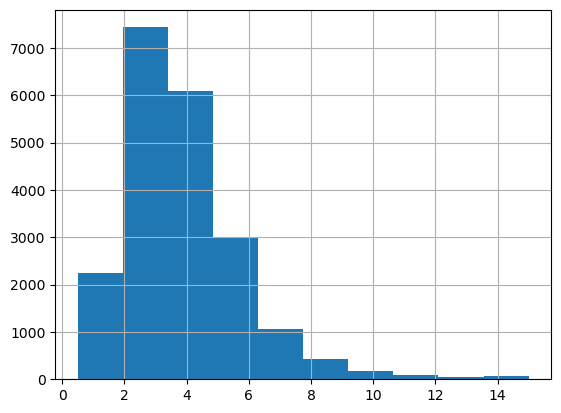

In [12]:
income = df["MedInc"]
# now you can look at the income distribution
income.hist()
plt.show()

In addition, we are only interested in apartment blocks with high house values (>4.0).
<br>
How do you cut the remaining blocks with lower house values? 

In [16]:
highValueBlocks = df[df["MedHouseVal"]>4]

highValueBlocks.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.52600
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
128,7.5544,40.0,7.631498,1.030581,1616.0,2.470948,37.83,-122.21,4.11500
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
155,8.8793,52.0,8.972868,1.131783,861.0,3.337209,37.81,-122.23,4.10300


#### Dicing:
Now, we want to see which blocks are at risk of upcoming gentrification.
<br>
It seems that blocks with relativly high income, young resident age (but no kids!) and low house values are often at risk of gentrification. Find those blocks!

In [33]:
# get all the blocks with above average income AND below average age AND on average less than 2 people per houshold AND below average house values
gentrificationRisk = df[
    (df["MedInc"] > df["MedInc"].mean()) & 
    (df["HouseAge"] < df["HouseAge"].mean()) & 
    (df["AveOccup"] < 2)  & 
    (df["MedHouseVal"] < df["MedHouseVal"].mean())
]

gentrificationRisk.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
508,4.0018,14.0,3.586056,1.174061,3100.0,1.511458,37.84,-122.30,1.438
882,4.1387,4.0,4.470167,1.184964,1606.0,1.916468,37.55,-121.96,1.625
1405,3.9816,10.0,4.735236,1.122097,2959.0,1.963504,37.96,-122.06,1.820
1507,4.4500,15.0,5.047219,1.036869,2957.0,1.912678,37.93,-122.05,1.849
1576,4.9018,17.0,6.200000,1.106667,146.0,1.946667,37.81,-121.99,1.885


#### Pivoting:
Let's rearrange the data table so we can grasp it a bit better.
<br>
First create two new grouping variables:
1) 'IncomeLevel': Group 'MedInc' with the bins [0, 2, 4, 6, 10] and the labels ['Low', 'Medium', 'High', 'Very High']
2) 'OceanProximity': Group 'Latitude' with the bins [32, 34, 36, 38, 42] and the labels ['Near', 'Coastal', 'Inland', 'Far']
Have a look at your new dataframe!
<br>
Second, create a pivot table with 'OceanProximity' levels as columns, 'IncomeLevel' as rows, and 'MedHouseVal' as cell values.

In [36]:
# Create a new categorical column for grouping
df['IncomeLevel'] = pd.cut(df['MedInc'], bins=[0, 2, 4, 6, 10], labels=['Low', 'Medium', 'High', 'Very High'])

# Task: Pivot table to view mean house value by income level and ocean proximity
# (assuming OceanProximity is added manually or mocked here for teaching)
df['OceanProximity'] = pd.cut(df['Latitude'], bins=[32, 34, 36, 38, 42], labels=['Near', 'Coastal', 'Inland', 'Far'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,IncomeLevel,OceanProximity
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Very High,Inland
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Very High,Inland
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Very High,Inland
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,High,Inland
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Medium,Inland


In [39]:
pivot_table = pd.pivot_table(df, values='MedHouseVal', index='IncomeLevel', columns='OceanProximity', aggfunc='mean', observed=False)
pivot_table

OceanProximity,Near,Coastal,Inland,Far
IncomeLevel,,,,
Low,1.149222,1.385187,1.004844,0.901453
Medium,1.735529,1.855564,1.754784,1.215979
High,2.402007,2.518038,2.653661,1.866900
Very High,3.490561,3.832296,3.749575,2.788190


#### Drill-Down:
We can look at our data at different "resolutions". The highest resolution means we are looking at every individual data point. But we can aggregate data, especially along hierarchical grouping variables.
<br>
Lets start by adding 'Regions', 'Zones' and 'District'.

In [47]:
import numpy as np

# Step 1: Create Region (North/South)
df['Region'] = np.where(df['Latitude'] >= 36, 'North', 'South')

# Step 2: Create Zone (based on both Lat & Lon)
def assign_zone(row):
    if row['Latitude'] >= 36:
        return 'Northeast' if row['Longitude'] > -119 else 'Northwest'
    else:
        return 'Southeast' if row['Longitude'] > -119 else 'Southwest'

df['Zone'] = df.apply(assign_zone, axis=1)
# Step 3: Simulate City Districts by rounding coordinates
df['District'] = df['Latitude'].round(1).astype(str) + "," + df['Longitude'].round(1).astype(str)


Let's drill down along the hierachie of our new variables!
<br>
Use the ``.groupby`` of pandas to inspect the average house values in the two regions.
<br>
Then take additionally the West-East factor into account.
<br>
Finally, find the 3 'Districts' for each 'Zone' with the highest average house values.

In [59]:
region_avg = df.groupby('Region')['MedHouseVal'].mean()
print(region_avg)

zone_avg = df.groupby(['Region', 'Zone'])['MedHouseVal'].mean()
print(zone_avg)

top_districts_per_zone = (
    df.groupby(['Zone', 'District'])['MedHouseVal']
    .mean()
    .reset_index()
    .sort_values(['Zone', 'MedHouseVal'], ascending=[True, False])
    .groupby('Zone')
    .head(3)
)
print(top_districts_per_zone)

Region
North    1.937384
South    2.166555
Name: MedHouseVal, dtype: float64
Region  Zone     
North   Northeast    1.123291
        Northwest    1.941836
South   Southeast    2.177292
        Southwest    2.033148
Name: MedHouseVal, dtype: float64
           Zone     District  MedHouseVal
29    Northeast  37.6,-119.0     1.770250
27    Northeast  37.4,-118.6     1.660000
28    Northeast  37.6,-118.7     1.593000
271   Northwest  37.4,-121.7     5.000010
617   Northwest  38.9,-120.1     5.000010
277   Northwest  37.4,-122.3     4.993342
1052  Southeast  32.9,-117.3     5.000010
1108  Southeast  33.4,-117.7     5.000010
1170  Southeast  33.7,-118.4     5.000010
1462  Southwest  34.3,-119.4     5.000010
1475  Southwest  34.5,-119.5     5.000010
1486  Southwest  34.7,-120.0     5.000010
